In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
avo_df = pd.read_csv('avocado.csv')

In [3]:
# remind ourselves of the content of this DF
avo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# remind ourselves what the regions are
avo_df["region"].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [7]:
# plot total volume of us conventional avocado sales over time. 
# we need to convert the Date column to a datetime and make sure it's sorted 
avo_df["Date"] = pd.to_datetime(avo_df["Date"])
avo_df = avo_df.sort_values("Date")



In [8]:
total_us_conv = avo_df.loc[(avo_df["region"] == "TotalUS") 
                           & (avo_df["type"] == "conventional")]
total_us_org = avo_df.loc[(avo_df["region"] == "TotalUS") 
                           & (avo_df["type"] == "organic")]

# Scatterplots

Text(0.5, 1.0, 'Volume vs. Price for US Conventional Avocado Sales')

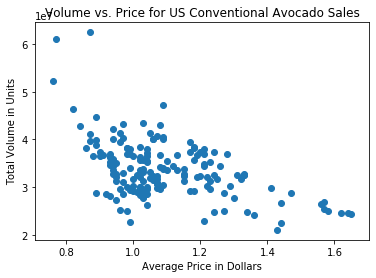

In [9]:
fig, ax = plt.subplots()
ax.scatter(total_us_conv["AveragePrice"], total_us_conv["Total Volume"])
ax.set_xlabel("Average Price in Dollars")
ax.set_ylabel("Total Volume in Units")
ax.set_title("Volume vs. Price for US Conventional Avocado Sales")




Text(0.5, 1.0, 'Volume vs. Price for US Organic Avocado Sales')

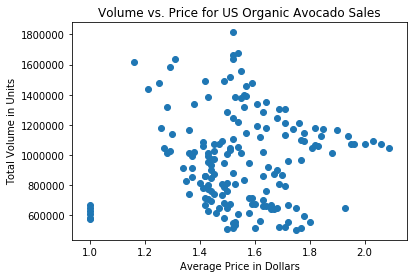

In [10]:
fig, ax = plt.subplots()
ax.scatter(total_us_org["AveragePrice"], total_us_org["Total Volume"])
ax.set_xlabel("Average Price in Dollars")
ax.set_ylabel("Total Volume in Units")
ax.set_title("Volume vs. Price for US Organic Avocado Sales")

Text(0.5, 1.0, 'Volume vs. Price for US Avocado Sales')

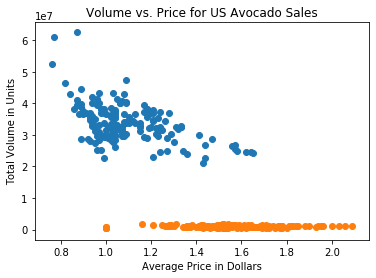

In [11]:
fig, ax = plt.subplots()
ax.scatter(total_us_conv["AveragePrice"], total_us_conv["Total Volume"])
ax.scatter(total_us_org["AveragePrice"], total_us_org["Total Volume"])
ax.set_xlabel("Average Price in Dollars")
ax.set_ylabel("Total Volume in Units")
ax.set_title("Volume vs. Price for US Avocado Sales")


Text(0.5, 1.0, 'Volume vs. Price for US Avocado Sales')

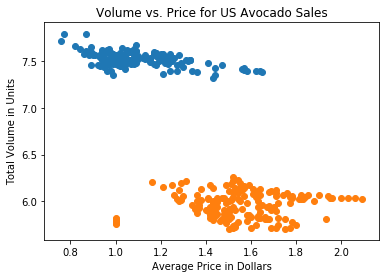

In [12]:
fig, ax = plt.subplots()
ax.scatter(total_us_conv["AveragePrice"], 
           np.log10(total_us_conv["Total Volume"]))
ax.scatter(total_us_org["AveragePrice"], 
           np.log10(total_us_org["Total Volume"]))
ax.set_xlabel("Average Price in Dollars")
ax.set_ylabel("Total Volume in Units")
ax.set_title("Volume vs. Price for US Avocado Sales")


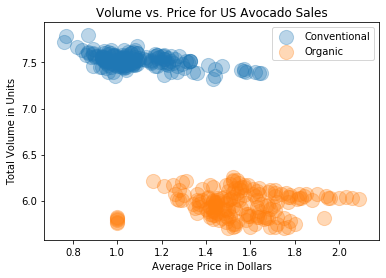

In [13]:
fig, ax = plt.subplots()
ax.scatter(total_us_conv["AveragePrice"], 
           np.log10(total_us_conv["Total Volume"]),
          s=200, alpha=0.3, label="Conventional")
ax.scatter(total_us_org["AveragePrice"], 
           np.log10(total_us_org["Total Volume"]),
          s=200, alpha=0.3, label="Organic")
ax.set_xlabel("Average Price in Dollars")
ax.set_ylabel("Total Volume in Units")
ax.set_title("Volume vs. Price for US Avocado Sales")
plt.legend()


# Line Plots 

/Users/caldermyers/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


(array([735599., 735719., 735842., 735964., 736085., 736208., 736330.,
        736450., 736573., 736695., 736815.]),
 <a list of 11 Text xticklabel objects>)

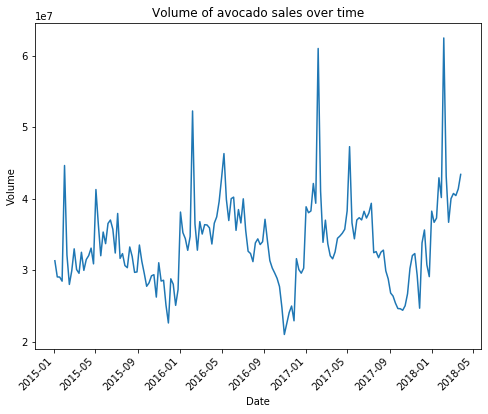

In [14]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(total_us_conv["Date"], total_us_conv["Total Volume"])
ax.set_xlabel("Date")
ax.set_ylabel("Volume")
ax.set_title("Volume of avocado sales over time")
plt.xticks(rotation=45, ha='right')

There appear to be a cyclical pattern with a huge spikes sometime between January and May each year. Do a temporary sort of the dataframe to find out the exct dates of these spikes in sales

In [18]:
superbowl_cities = ['Atlanta', 'Boston', 'Charlotte', 'Denver']
avo_df_conv = avo_df.loc[avo_df["type"] == "conventional"]

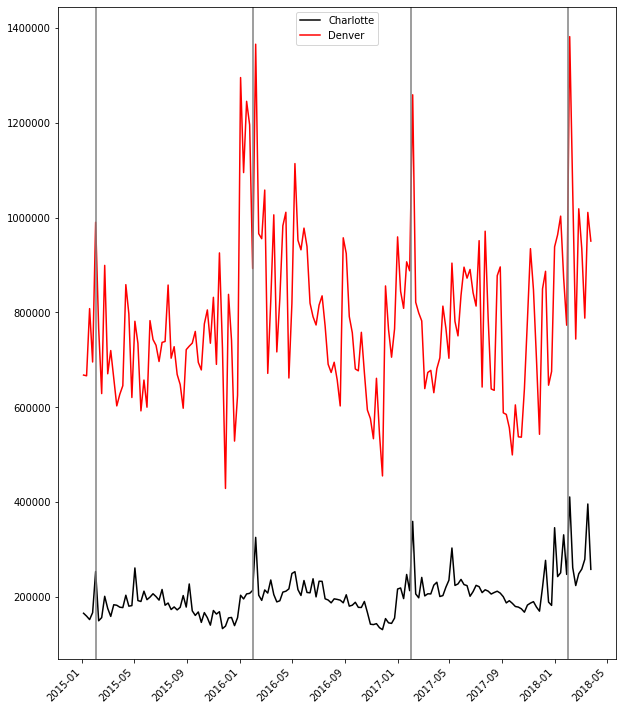

In [29]:
fig, ax = plt.subplots(figsize=(10,12))


city_df = avo_df_conv.loc[avo_df_conv["region"] == 'Charlotte']
ax.plot(city_df["Date"], city_df["Total Volume"], label = 'Charlotte', c='k')
city_df = avo_df_conv.loc[avo_df_conv["region"] == 'Denver']
ax.plot(city_df["Date"], city_df["Total Volume"], label = 'Denver', c='r')

for date in pd.to_datetime(['2/1/2015', '2/1/2016', '2/1/2017', '2/1/2018']):
    ax.axvline(date, c='grey')
    
plt.xticks(rotation=45, ha='right')
plt.legend()    

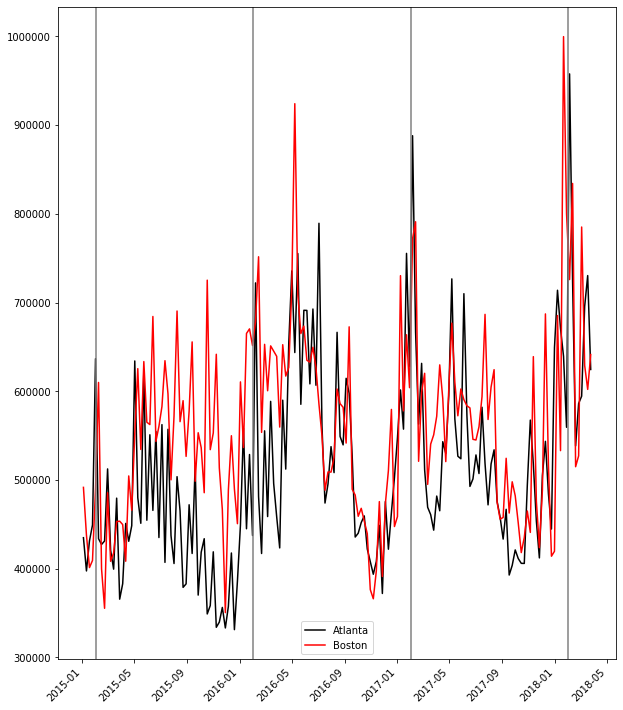

In [30]:
fig, ax = plt.subplots(figsize=(10,12))


city_df = avo_df_conv.loc[avo_df_conv["region"] == 'Atlanta']
ax.plot(city_df["Date"], city_df["Total Volume"], label = 'Atlanta', c='k')
city_df = avo_df_conv.loc[avo_df_conv["region"] == 'Boston']
ax.plot(city_df["Date"], city_df["Total Volume"], label = 'Boston', c='r')

for date in pd.to_datetime(['2/1/2015', '2/1/2016', '2/1/2017', '2/1/2018']):
    ax.axvline(date, c='grey')
    
plt.xticks(rotation=45, ha='right')
plt.legend()    

# Bar charts

In [34]:
# Which of the following cities had the greates total conventional avocado sales in 2016? 
# Albany, Charlotte, or Louiseville? 

In [38]:
# create a DatafRame with only these three cities. start from conv_all_regions and filter to only 2016
conv_all_regions = avo_df.loc[avo_df["type"] == "conventional"]
conv_all_regions_2016 = conv_all_regions.loc[conv_all_regions["Date"].dt.year == 2016]
# call it 'conv_alb_clt_lvl'
conv_alb_clt_lvl_2016 = conv_all_regions_2016.loc[
                            conv_all_regions_2016["region"]
                            .isin(["Albany", "Charlotte", "Louisville"])]




In [39]:
# now groubpy region and get the sum of total volume

sales_alb_clt_lvl_2016 = conv_alb_clt_lvl_2016.groupby("region").agg({"Total Volume": "sum"})

Text(0.5, 1.0, 'Total volume of avocados sold in 2016')

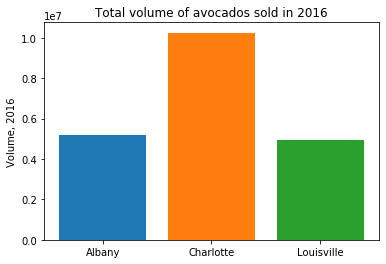

In [41]:
# create a bar chart. color the three bars with 'tab:blue', 'tab:orange', and 'tab:green', respectively
fig, ax = plt.subplots()
ax.bar(sales_alb_clt_lvl_2016.index, 
        sales_alb_clt_lvl_2016["Total Volume"], 
        color=['tab:blue', 'tab:orange', 'tab:green'])
ax.set_ylabel("Volume, 2016")
ax.set_title("Total volume of avocados sold in 2016")



Text(0.5, 1.0, 'Total volume of avocados sold in 2016')

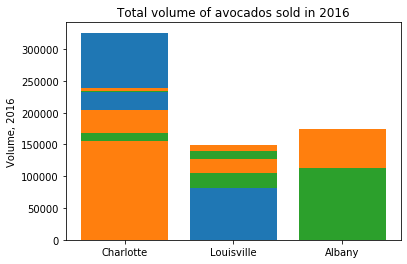

In [44]:
# create a bar chart. color the three bars with 'tab:blue', 'tab:orange', and 'tab:green', respectively
fig, ax = plt.subplots()
ax.bar(conv_alb_clt_lvl_2016["region"], 
        conv_alb_clt_lvl_2016["Total Volume"], 
        color=['tab:blue', 'tab:orange', 'tab:green'])
ax.set_ylabel("Volume, 2016")
ax.set_title("Total volume of avocados sold in 2016")



AttributeError: 'Rectangle' object has no property 'stacked'

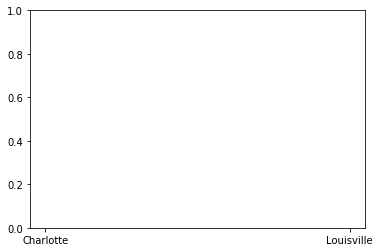

In [46]:
# create a bar chart. color the three bars with 'tab:blue', 'tab:orange', and 'tab:green', respectively
fig, ax = plt.subplots()
ax.bar(conv_alb_clt_lvl_2016["region"], 
        conv_alb_clt_lvl_2016["Total Volume"], 
        color=['tab:blue', 'tab:orange', 'tab:green'])
ax.set_ylabel("Volume, 2016")
ax.set_title("Total volume of avocados sold in 2016")

